    Здесь буду собирать бейзлайны и немношк инфы по основным алгоритмам ML. Ехала

# <center>Read, check null, transform

In [3]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
# DataAnalisys
import numpy as np
import pandas as pd
# ML
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
# Visualization
%matplotlib inline
import seaborn as sns
sns.set()
%matplotlib inline
from matplotlib import pyplot as plt




C:\Users\Aleksey\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
#загрузка данных
df = pd.read_csv('../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Общий обзор, заполнение пропусков(если надо), преобразования к типам данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Небольшой препроцессинг по преобразованию фич к численному виду
Преобразование Yes/No к 1/0

In [44]:
df['International plan'] = pd.factorize(df['International plan'])[0]
df['Voice mail plan'] = pd.factorize(df['Voice mail plan'])[0]
df['Churn'] = df['Churn'].astype('int')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Преобразование физи из вида numeric, значения от 1 до 3, к 3м фичам бинарного вида

In [ ]:
df['StateOh'] = (df['State'] == 'OH').astype('int')
df = df.drop(['StateOh'], axis=1)
df.head()

Функция, преобразующая фича из 3х классов в 3 фичи. Можно допиливать и до N фич

In [27]:
def feature_to_3_classes(dataFrame, featureName):
    dataFrame['Low_'+featureName] = (dataFrame[featureName] == 1).astype('int')
    dataFrame['Med_'+featureName] = (dataFrame[featureName] == 2).astype('int')
    dataFrame['High_'+featureName] = (dataFrame[featureName] == 3).astype('int')
    dataFrame = dataFrame.drop([featureName], axis=1)
    

Трейн, тест, таргет

In [45]:
y = df['Churn']
df = df.drop(['State'], axis=1) # только мешает. Хотя можно было его перекодировать в классовую фичу.
df = df.drop(['Churn'], axis=1) # целевую тоже дропнем
X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

Замена пропусков меданными значениями

# <center> Decision Trees

In [46]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
import collections
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus

Классификатор

In [47]:
dtc = DecisionTreeClassifier(random_state = 17)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

Регрессор

In [16]:
dtr = DecisionTreeRegressor(random_state=17)

Визуализация дерева

In [48]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

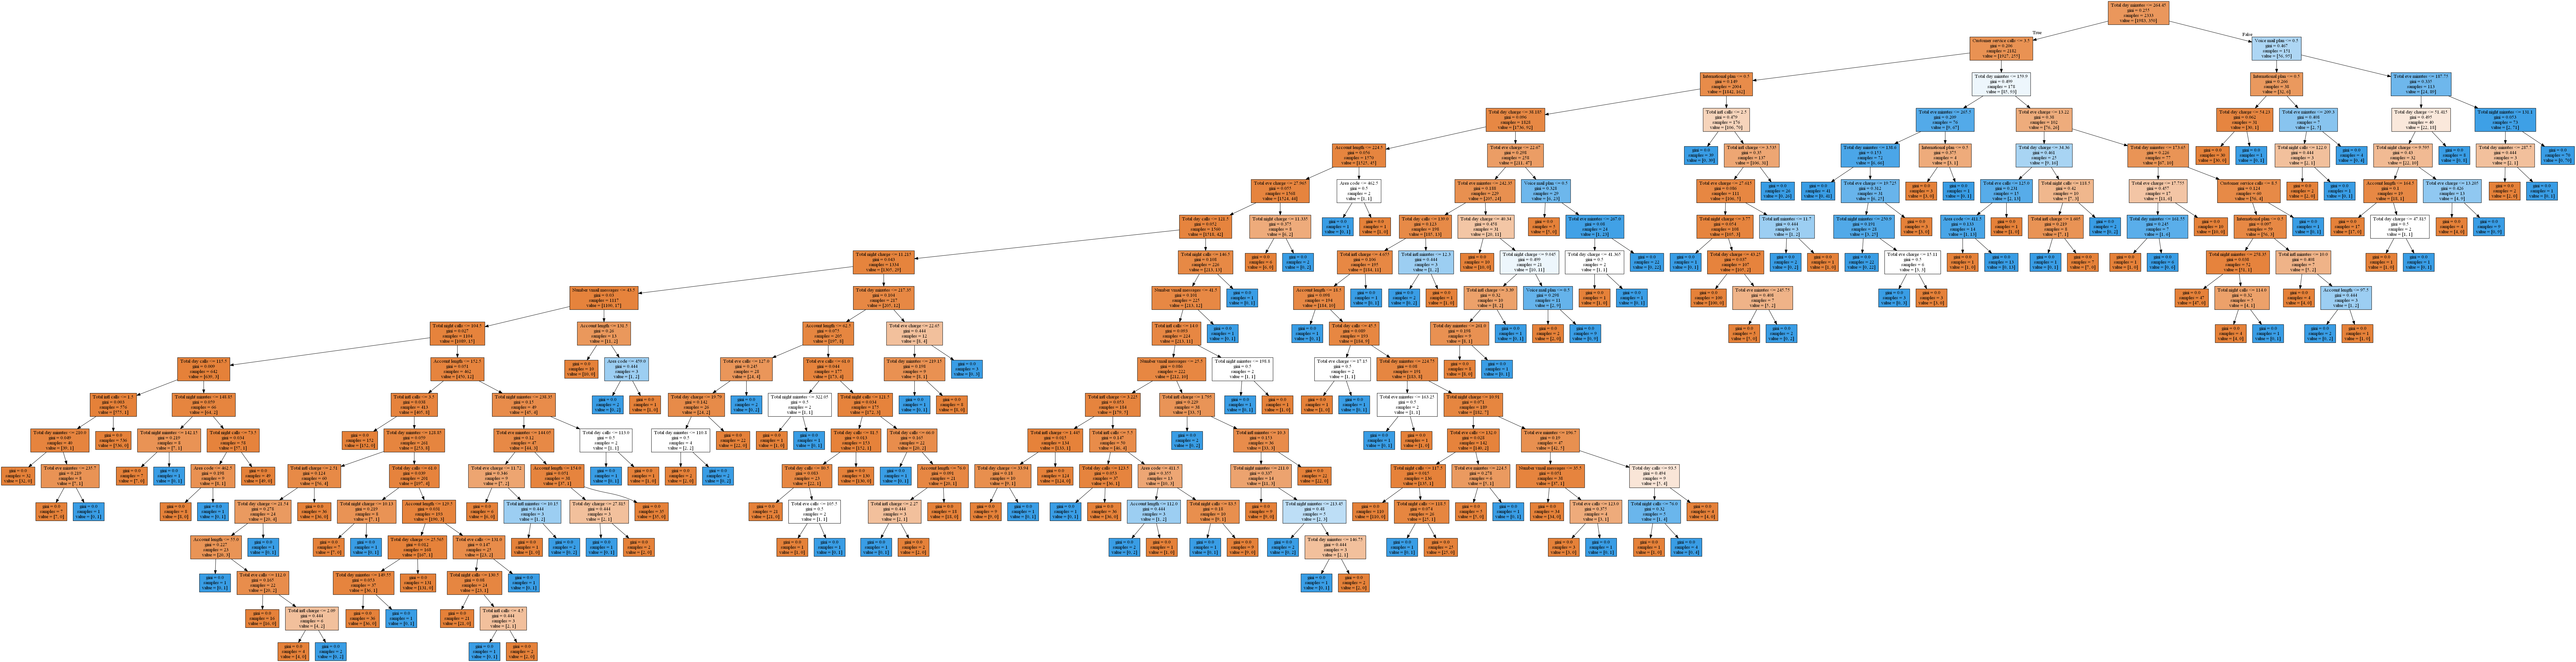

In [49]:

from IPython.display import Image
fnames = list(df)
path = './img/baseLines_Examples_tree1.png'
tree_graph_to_png(tree=dtc, feature_names=fnames, png_file_to_save=path)
Image(filename=path) 

Поиск лучших параметров при помощи кросс-валидации

In [50]:
print(len(list(df)))
#df.head()

18


Посмотрим на точность без тюнинга параметров

In [51]:
y_predictions = dtc.predict(X_holdout)
acc = accuracy_score(y_holdout, y_predictions)
# print(y_holdout)
# print(y_predictions)
acc

0.92

In [52]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,18)}

tree_grid = GridSearchCV(dtc, tree_params,
                         cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    6.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(1, 11), 'max_features': range(4, 18)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [53]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 17}

In [55]:
best_dtc = DecisionTreeClassifier(random_state = 17, max_depth = 6, max_features = 17)
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=17, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [56]:
y_predictions2 = best_dtc.predict(X_holdout)
acc2 = accuracy_score(y_holdout, y_predictions2)
# print(y_holdout)
# print(y_predictions)
acc2

0.946

Тюнинг параметров. GridSearch и все такое

In [3]:
# метод для кроссвалидации параметров, каждый будем обучать и проверять на пачке
def cross_val(X, y, param, cat_features, n_splits=3):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)
    
    acc = []
    predict = None
    
    for tr_ind, val_ind in skf.split(X, y):
        X_train = X[tr_ind]
        y_train = y[tr_ind]
        
        X_valid = X[val_ind]
        y_valid = y[val_ind]
        
        clf = CatBoostClassifier(iterations=500,
                                depth=param['depth'],
                                l2_leaf_reg = param['l2_leaf_reg'],
                                eval_metric = 'AUC', # нужна ли?
                                leaf_estimation_iterations = 10,
                                use_best_model=True,
                                logging_level='Silent'
                                 , task_type='GPU'
        )
        
        clf.fit(X_train, y_train, cat_features=cat_features
                , eval_set=(X_valid, y_valid)
               )
        
        y_pred = clf.predict_proba(X_valid)[:, 1]
        #check shapes
#         print(y_valid.shape, y_pred.shape)
        
        accuracy = roc_auc_score(y_valid, y_pred)
        acc.append(accuracy)
    return sum(acc)/n_splits

In [2]:
from tqdm import tqdm
from sklearn.grid_search import ParameterGrid
import warnings
warnings.filterwarnings('ignore')
# найдем лучшие
def catboost_GridSearchCV(X, y, params, cat_features, n_splits=5):
    ps = {'acc':0,
          'param': []}
    predict=None
    for prms in tqdm(list(ParameterGrid(params)), ascii=True, desc='Params Tuning:'):
        acc = cross_val(X, y, prms, cat_features, n_splits=5)
        print('Current auc: ', acc, '    Max auc: ', ps['acc'])
        print('Params: ': str(prms))
        if acc>ps['acc']:
            ps['acc'] = acc
            ps['param'] = prms
    print('Acc: '+str(ps['acc']))
    print('Params: '+str(ps['param']))
    
    return ps['param']

SyntaxError: invalid syntax (<ipython-input-2-faed6038bb47>, line 13)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import ParameterGrid
from sklearn.model_selection import train_test_split
from itertools import product, chain
from tqdm import tqdm

RANDOM_STATE = 0

# вызовы и все такое
def main():
    
    #уже готово, заменить
    X_train, y_train = X_train_new, y_train_new
    X_test = test_df.drop('dep_delayed_15min', axis=1).values
    cat_features = categ_feat_idx_new
    
    params = {'depth':[4,5,6,7,8,9,10],
              'l2_leaf_reg':[1,3,5,10,100]}
    
    # найдем лучшие параметры
    param = catboost_GridSearchCV(X_train, y_train, params, cat_features)
    
    # применим их для создания новой модели
    clf = CatBoostClassifier(iterations=2500,
                            depth=param['depth'],
                            l2_leaf_reg = param['l2_leaf_reg'],
                            leaf_estimation_iterations = 10,
                            use_best_model=True, 
                             task_type='GPU', Border count = 254
    )
    # разбитие выборки
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, shuffle=True, random_state=RANDOM_STATE, 
                                                          train_size=0.8,stratify=y_train
    )
    # обучение
    clf.fit(X_train, y_train, cat_features=cat_features, logging_level='Silent',
            eval_set=(X_valid, y_valid)
    )
    
    # результаты дерева после тюнинга параметров
    y_pred = clf.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, y_pred)
    print('Результаты после тюнинга параметров: ', roc_auc)
    
    # применение в действие
    ctb_v3_pred = clf.predict_proba(test)[:, 1]
    sample_sub = pd.read_csv(PATH_TO_DATA / 'sample_submission.csv', index_col='id')
    sample_sub['dep_delayed_15min'] = ctb_v3_pred
    sample_sub.to_csv(PATH_TO_DATA /'ctb_v3.csv')
    
if __name__=='__main__':
    main()

SyntaxError: invalid syntax (<ipython-input-1-6f1445ae0c86>, line 33)